## Agnieszka Kamińska - Postgraduate project in Python: 

### " Global warming as a result of climate change - on the example of  Ankara (capital of Turkey). Citiy with significant temperature increase in years:  2000-2020 " - additional file with plots

In [1]:
# Uploading libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Data from website: Our World in Data

# uploading 'ghg-emissions-by-world-region.csv' 

file_path_0 = r"C:\Users\Admin\OneDrive\Pulpit\Post_Diploma_project\Turkey_pollution\ghg-emissions-by-world-region.csv"
 
# Read the CSV file into a DataFrame
GHG_emissions_1865_2022 = pd.read_csv(file_path_0, encoding='UTF-8') 


# Filter rows where 'Entity' is 'Turkey'
# Filter rows where 'Entity' is 'Turkey'
GHG_emissions_1865_2022_Turkey = GHG_emissions_1865_2022[(GHG_emissions_1865_2022['Entity'] == 'Turkey') & 
                                                        (GHG_emissions_1865_2022['Year'] >= 1865) & 
                                                        (GHG_emissions_1865_2022['Year'] <= 2022)]

# Display the filtered data
GHG_emissions_1865_2022_Turkey

,Entity,Code,Year,Annual greenhouse gas emissions,Annual CO2‚ emissions
34243,Turkey,TUR,1865,17062552.0,150224.0
34244,Turkey,TUR,1866,16974010.0,208848.0
34245,Turkey,TUR,1867,16867436.0,227168.0
34246,Turkey,TUR,1868,16699147.0,175872.0
34247,Turkey,TUR,1869,16682708.0,267472.0
...,...,...,...,...,...
34395,Turkey,TUR,2017,558437570.0,430900860.0
34396,Turkey,TUR,2018,555844540.0,422058620.0
34397,Turkey,TUR,2019,539872700.0,402692260.0
34398,Turkey,TUR,2020,556348200.0,412926880.0


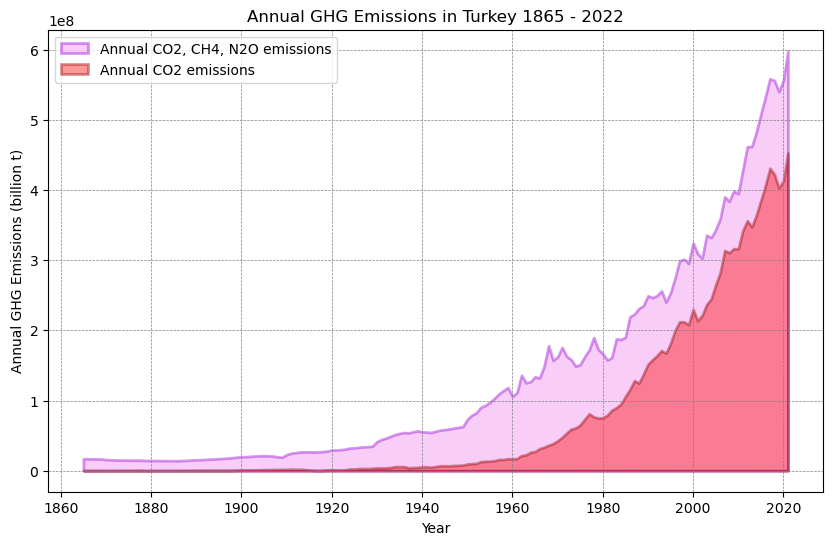

In [8]:
# Plotting as an area chart with edges marked for 'ghg-emissions-by-world-region.csv' 
 
plt.figure(figsize=(10, 6))
plt.fill_between(GHG_emissions_1865_2022_Turkey['Year'],
                 GHG_emissions_1865_2022_Turkey['Annual greenhouse gas emissions'],
                 color='violet', alpha=0.4, edgecolor='darkviolet', linewidth=2,
                 label='Annual CO2, CH4, N2O emissions')

plt.fill_between(GHG_emissions_1865_2022_Turkey['Year'],
                 GHG_emissions_1865_2022_Turkey['Annual CO2‚ emissions'],
                 color='red', alpha=0.4, edgecolor='darkred', linewidth=2,
                 label='Annual CO2 emissions')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Annual GHG Emissions (billion t)')
plt.title('Annual GHG Emissions in Turkey 1865 - 2022')

# Display the legend
plt.legend(loc='upper left')

# Display the plot with a black background and white grid lines
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')

# Set the figure background color to white
plt.gcf().set_facecolor('white')

plt.show()


In [7]:
# Data from website: Our World in Data

# uploading 'annual-co2-emissions-per-country.csv' 

file_path_1 = r"C:\Users\Admin\OneDrive\Pulpit\Post_Diploma_project\Turkey_pollution\annual-co2-emissions-per-country.csv"
 
# Read the CSV file into a DataFrame
CO2_emissions_1865_2022 = pd.read_csv(file_path_1, encoding='UTF-8') 


# Filter rows where 'Entity' is 'Turkey'
CO2_emissions_1865_2022_Turkey = CO2_emissions_1865_2022[CO2_emissions_1865_2022['Entity'] == 'Turkey']

# Display the filtered data
CO2_emissions_1865_2022_Turkey

,Entity,Code,Year,Annual CO2‚ emissions
27458,Turkey,TUR,1865,150224.0
27459,Turkey,TUR,1866,208848.0
27460,Turkey,TUR,1867,227168.0
27461,Turkey,TUR,1868,175872.0
27462,Turkey,TUR,1869,267472.0
...,...,...,...,...
27611,Turkey,TUR,2018,422058620.0
27612,Turkey,TUR,2019,402692260.0
27613,Turkey,TUR,2020,412926880.0
27614,Turkey,TUR,2021,452702800.0


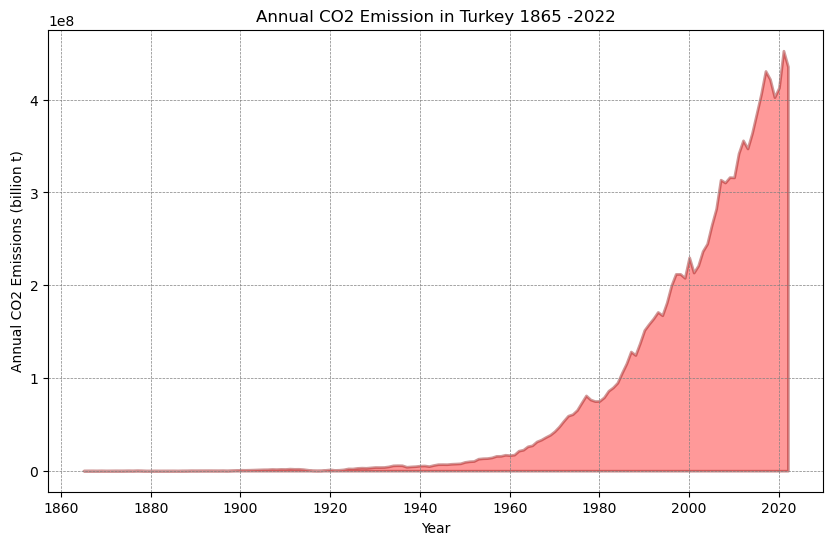

In [29]:
# Plotting as an area chart with edges marked
plt.figure(figsize=(10, 6))
plt.fill_between(CO2_emissions_1865_2022_Turkey['Year'],
                 CO2_emissions_1865_2022_Turkey['Annual CO2‚ emissions'],
                 color='red', alpha=0.4, edgecolor='darkred', linewidth=2)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions (billion t)')
plt.title('Annual CO2 Emission in Turkey 1865 -2022')

# Display the plot with a black background and white grid lines
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')

# Set the figure background color to black
plt.gcf().set_facecolor('white')

plt.show()

In [22]:
# Data from website: Our World in Data

# uploading 'co2-emissions-by-sector' 

file_path_2 = r"C:\Users\Admin\OneDrive\Pulpit\Post_Diploma_project\Turkey_pollution\co2-emissions-by-sector.csv"
 
# Read the CSV file into a DataFrame
CO2_emissions_by_sector_1990_2020 = pd.read_csv(file_path_2, encoding='UTF-8') 

# Filter rows where 'Entity' is 'Turkey'
CO2_emissions_by_sector_1990_2020_Turkey = CO2_emissions_by_sector_1990_2020[CO2_emissions_by_sector_1990_2020['Entity'] == 'Turkey']

# Display the filtered data
CO2_emissions_by_sector_1990_2020_Turkey

# Drop the column "Fugitive emissions - Energy production" - they were only NANs
CO2_emissions_by_sector_1990_2020_Turkey = CO2_emissions_by_sector_1990_2020_Turkey.drop('Fugitive emissions - Energy production', axis=1)

CO2_emissions_by_sector_1990_2020_Turkey

,Entity,Code,Year,Buildings,Industry,Land use change and forestry,Other fuel combustion,Transport,Manufacturing and construction,Electricity and heat
5797,Turkey,TUR,1990,22800000.0,10440000.0,-16940000.0,5900000.0,27850000.0,32759998.0,39440000.0
5798,Turkey,TUR,1991,23320000.0,12020000.0,-16940000.0,5840000.0,26560000.0,34570000.0,41490000.0
5799,Turkey,TUR,1992,25580000.0,13270000.0,-16940000.0,5970000.0,27110000.0,33160000.0,44700000.0
5800,Turkey,TUR,1993,24790000.0,13050000.0,-16940000.0,7210000.0,32270000.0,33160000.0,45090000.0
5801,Turkey,TUR,1994,20850000.0,13490000.0,-16940000.0,7250000.0,31340000.0,30340000.0,50560000.0
5802,Turkey,TUR,1995,25490000.0,14130000.0,-16940000.0,7810000.0,35200000.0,33690000.0,51830000.0
5803,Turkey,TUR,1996,25830000.0,14660000.0,-16940000.0,8140001.0,36990000.0,42080000.0,57630000.0
5804,Turkey,TUR,1997,27200000.0,15100000.0,-16940000.0,8080000.0,34350000.0,45510000.0,63180000.0
5805,Turkey,TUR,1998,24030000.0,15290000.0,-16940000.0,8010000.0,31720000.0,47000000.0,67640000.0
5806,Turkey,TUR,1999,23270000.0,14590000.0,-16940000.0,8230000.0,33300000.0,41360000.0,71900000.0


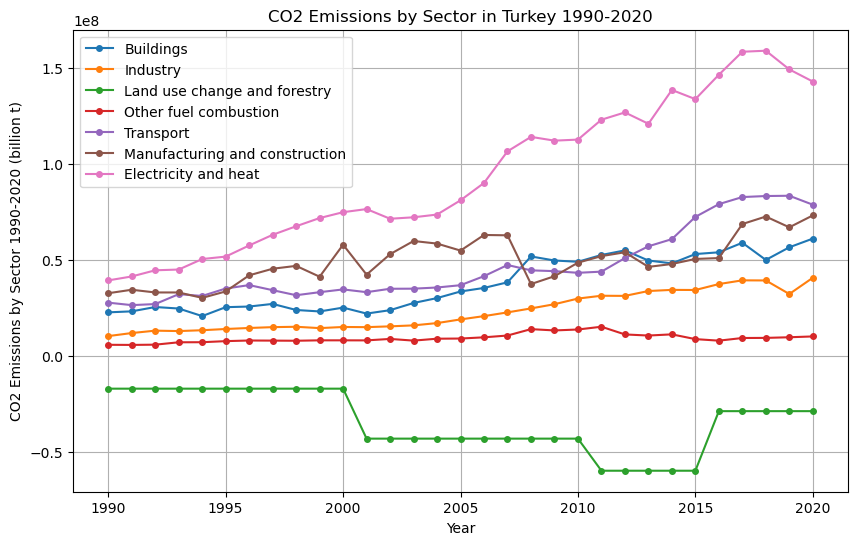

In [60]:
# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(CO2_emissions_by_sector_1990_2020_Turkey['Year'], CO2_emissions_by_sector_1990_2020_Turkey['Buildings'], label='Buildings', marker='o', markersize=4)
plt.plot(CO2_emissions_by_sector_1990_2020_Turkey['Year'], CO2_emissions_by_sector_1990_2020_Turkey['Industry'], label='Industry', marker='o', markersize=4)
plt.plot(CO2_emissions_by_sector_1990_2020_Turkey['Year'], CO2_emissions_by_sector_1990_2020_Turkey['Land use change and forestry'], label='Land use change and forestry', marker='o', markersize=4)
plt.plot(CO2_emissions_by_sector_1990_2020_Turkey['Year'], CO2_emissions_by_sector_1990_2020_Turkey['Other fuel combustion'], label='Other fuel combustion', marker='o', markersize=4)
plt.plot(CO2_emissions_by_sector_1990_2020_Turkey['Year'], CO2_emissions_by_sector_1990_2020_Turkey['Transport'], label='Transport', marker='o', markersize=4)
plt.plot(CO2_emissions_by_sector_1990_2020_Turkey['Year'], CO2_emissions_by_sector_1990_2020_Turkey['Manufacturing and construction'], label='Manufacturing and construction', marker='o', markersize=4)
plt.plot(CO2_emissions_by_sector_1990_2020_Turkey['Year'], CO2_emissions_by_sector_1990_2020_Turkey['Electricity and heat'], label='Electricity and heat', marker='o', markersize=4)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emissions by Sector 1990-2020 (billion t)')
plt.title('CO2 Emissions by Sector in Turkey 1990-2020')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [49]:
# Data from website: Our World in Data

# uploading 'electricity-prod-source-stacked' 

file_path_3 = r"C:\Users\Admin\OneDrive\Pulpit\Post_Diploma_project\Turkey_pollution\electricity-prod-source-stacked.csv"
 
# Read the CSV file into a DataFrame
Electricity_Prod_Source_Stacked_1985_2022 = pd.read_csv(file_path_3, encoding='UTF-8') 

# Filter rows where 'Entity' is 'Turkey'
Electricity_Prod_Source_Stacked_1985_2022_Turkey = Electricity_Prod_Source_Stacked_1985_2022[Electricity_Prod_Source_Stacked_1985_2022['Entity'] == 'Turkey']

# Display data
Electricity_Prod_Source_Stacked_1985_2022_Turkey

,Entity,Code,Year,Other renewables excluding Bioenergy,Electricity from Bioenergy,Electricity from Solar,Electricity from Wind,Electricity from Hydro,Electricity from Nuclear,Electricity from Oil,Electricity from Gas,Electricity from Coal
5789,Turkey,TUR,1985,0.0,0.0,0.0,0.0,12.0,0.0,7.1,0.1,15.0
5790,Turkey,TUR,1986,0.0,0.0,0.0,0.0,11.9,0.0,7.0,1.3,19.4
5791,Turkey,TUR,1987,0.0,0.0,0.0,0.0,18.6,0.0,5.5,2.5,17.7
5792,Turkey,TUR,1988,0.0,0.0,0.0,0.0,28.9,0.0,3.3,3.2,12.5
5793,Turkey,TUR,1989,0.0,0.0,0.0,0.0,17.9,0.0,4.2,9.5,20.3
5794,Turkey,TUR,1990,0.1,0.0,0.0,0.0,23.2,0.0,3.9,10.2,20.2
5795,Turkey,TUR,1991,0.1,0.0,0.0,0.0,22.7,0.0,3.3,12.6,21.6
5796,Turkey,TUR,1992,0.1,0.1,0.0,0.0,26.6,0.0,5.3,10.8,24.5
5797,Turkey,TUR,1993,0.1,0.1,0.0,0.0,34.0,0.0,5.2,10.8,23.7
5798,Turkey,TUR,1994,0.1,0.1,0.0,0.0,30.6,0.0,5.6,13.8,28.2


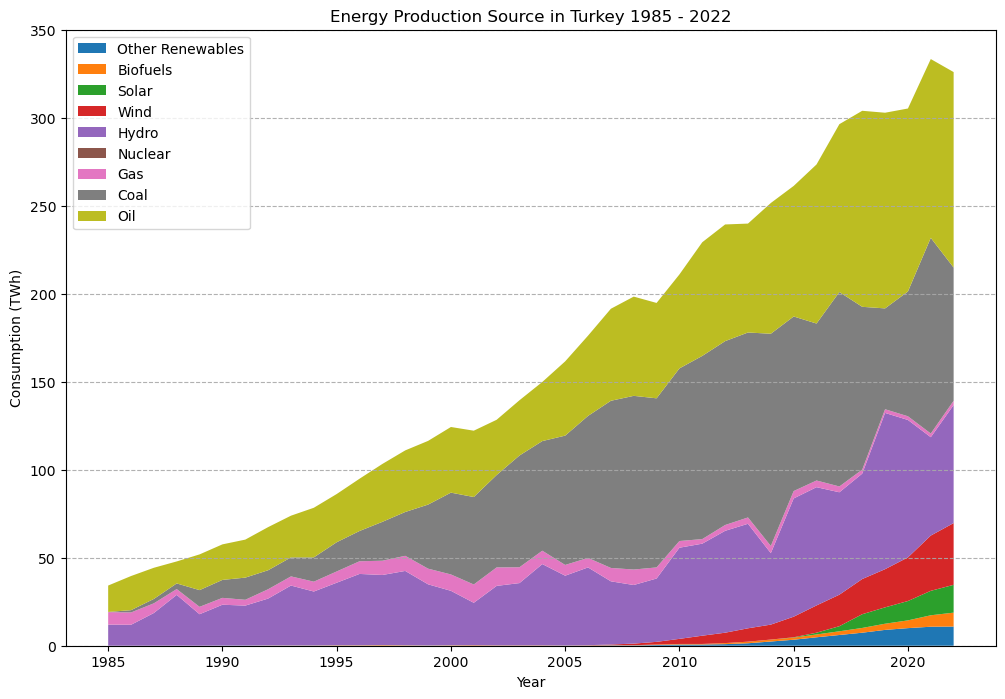

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataframe is named 'df'
# Extracting the 'Year' column and other columns for plotting
years = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Year']
renewables = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Other renewables excluding Bioenergy']
biofuels = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Electricity from Bioenergy']
solar = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Electricity from Solar']
wind = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Electricity from Wind']
hydro = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Electricity from Hydro']
nuclear = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Electricity from Nuclear']
gas = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Electricity from Oil']
coal = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Electricity from Gas']
oil = Electricity_Prod_Source_Stacked_1985_2022_Turkey['Electricity from Coal']

# Plotting the data as a stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(years, renewables, biofuels, solar, wind, hydro, nuclear, gas, coal, oil, labels=['Other Renewables', 'Biofuels', 'Solar', 'Wind', 'Hydro', 'Nuclear', 'Gas', 'Coal', 'Oil'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)')
plt.title('Energy Production Source in Turkey 1985 - 2022')
plt.legend()

# Placing the legend on the left side
plt.legend(loc='upper left')

# Adding vertical gridlines
plt.grid(axis='y',color='darkgrey', linestyle='--', alpha=0.9)

# Show the plot
plt.show()


In [14]:
# Data from website: Our World in Data

# uploading 'annual-deforestation' 

file_path_4 = r"C:\Users\Admin\OneDrive\Pulpit\Post_Diploma_project\Turkey_pollution\annual-deforestation.csv"
 
# Read the CSV file into a DataFrame
Annual_deforestation_1990_2015 = pd.read_csv(file_path_4, encoding='UTF-8') 

# Filter rows where 'Entity' is 'Turkey'
Annual_deforestation_1990_2015_Turkey = Annual_deforestation_1990_2015[Annual_deforestation_1990_2015['Entity'] == 'Turkey']

# Display data
Annual_deforestation_1990_2015_Turkey

,Entity,Code,Year,Deforestation
451,Turkey,TUR,1990,2220.0
452,Turkey,TUR,2000,1380.0
453,Turkey,TUR,2010,1030.0
454,Turkey,TUR,2015,1170.0


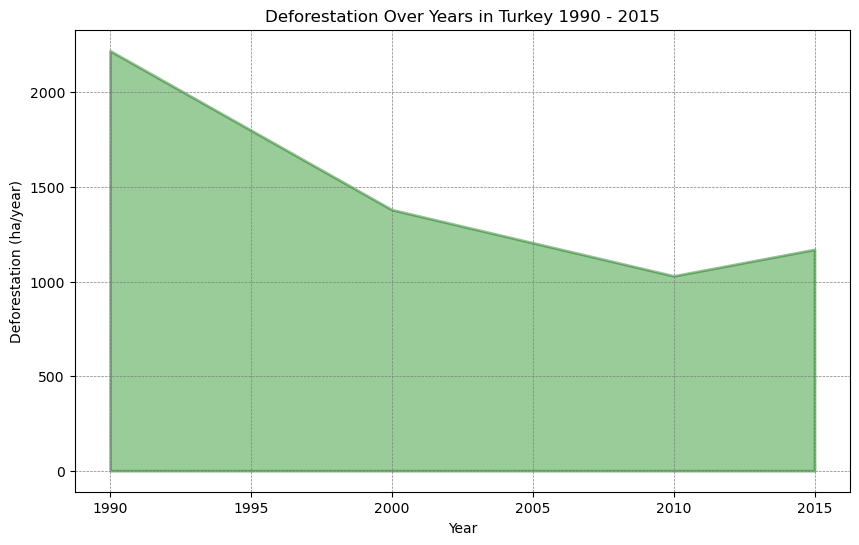

In [15]:
# Plotting as an area chart with edges marked
plt.figure(figsize=(10, 6))
plt.fill_between(Annual_deforestation_1990_2015_Turkey['Year'],
                 Annual_deforestation_1990_2015_Turkey['Deforestation'],
                 color='green', alpha=0.4, edgecolor='darkgreen', linewidth=2)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Deforestation (ha/year)')
plt.title('Deforestation Over Years in Turkey 1990 - 2015')

# Display the plot with a black background and white grid lines
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')

# Set the figure background color to black
plt.gcf().set_facecolor('white')

plt.show()

In [44]:
# Data from website: Our World in Data

# uploading 'agricultural-land' 

file_path_5 = r"C:\Users\Admin\OneDrive\Pulpit\Post_Diploma_project\Turkey_pollution\agricultural-land.csv"
 
# Read the CSV file into a DataFrame
Agricultural_land_1961_2020 = pd.read_csv(file_path_5, encoding='UTF-8') 

# Filter rows where 'Entity' is 'Turkey'
Agricultural_land_1961_2020_Turkey = Agricultural_land_1961_2020[Agricultural_land_1961_2020['Entity'] == 'Turkey']

# Display data
Agricultural_land_1961_2020_Turkey

,Entity,Code,Year,Agricultural land
13933,Turkey,TUR,1961,36517000.0
13934,Turkey,TUR,1962,36648000.0
13935,Turkey,TUR,1963,37370000.0
13936,Turkey,TUR,1964,37292000.0
13937,Turkey,TUR,1965,37296000.0
13938,Turkey,TUR,1966,37484000.0
13939,Turkey,TUR,1967,37300000.0
13940,Turkey,TUR,1968,37601000.0
13941,Turkey,TUR,1969,38643000.0
13942,Turkey,TUR,1970,38178000.0


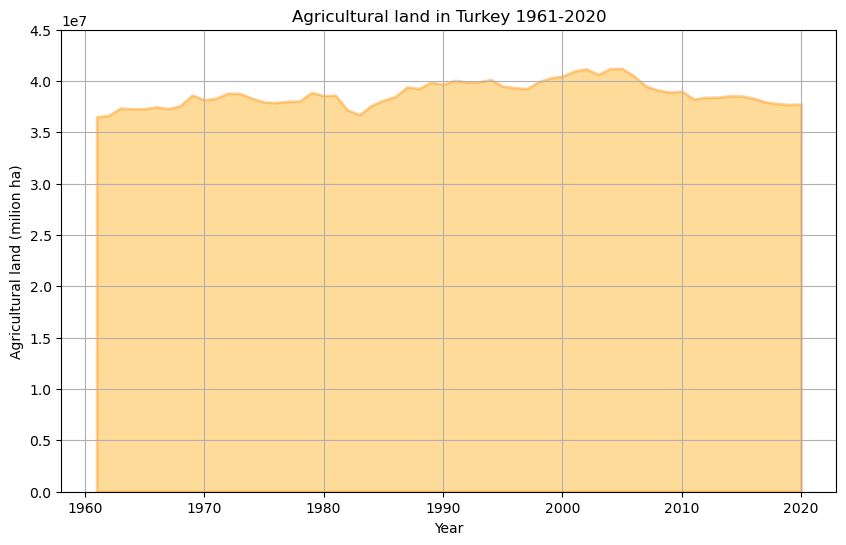

In [68]:
# Plotting Year vs. Agricultural
plt.figure(figsize=(10, 6))
plt.fill_between(Agricultural_land_1961_2020_Turkey['Year'],
                 Agricultural_land_1961_2020_Turkey['Agricultural land'],
                 color='orange', alpha=0.4, edgecolor='darkorange', linewidth=2)
plt.title('Agricultural land in Turkey 1961-2020')
plt.xlabel('Year')
plt.ylabel('Agricultural land (milion ha)')
# Set y-axis scale to 0.5
plt.ylim(0, 45000000, 5000000)

plt.grid(True)
plt.show()

In [10]:
# Data from website: Our World in Data

# uploading 'beef-and-buffalo-meat-production-tonnes' 

file_path_6 = r"C:\Users\Admin\OneDrive\Pulpit\Post_Diploma_project\Turkey_pollution\beef-and-buffalo-meat-production-tonnes.csv"
 
# Read the CSV file into a DataFrame
Beef_and_Buffalo_meat_production_1961_2021 = pd.read_csv(file_path_6, encoding='UTF-8') 

# Filter rows where 'Entity' is 'Turkey'
Beef_and_Buffalo_meat_production_1961_2021_Turkey = Beef_and_Buffalo_meat_production_1961_2021[Beef_and_Buffalo_meat_production_1961_2021['Entity'] == 'Turkey']

# Display data
Beef_and_Buffalo_meat_production_1961_2021_Turkey

,Entity,Code,Year,"Meat, beef and buffalo"
12621,Turkey,TUR,1961,109067
12622,Turkey,TUR,1962,119432
12623,Turkey,TUR,1963,116722
12624,Turkey,TUR,1964,109634
12625,Turkey,TUR,1965,114703
...,...,...,...,...
12677,Turkey,TUR,2017,1099709
12678,Turkey,TUR,2018,1287749
12679,Turkey,TUR,2019,1337320
12680,Turkey,TUR,2020,1349870


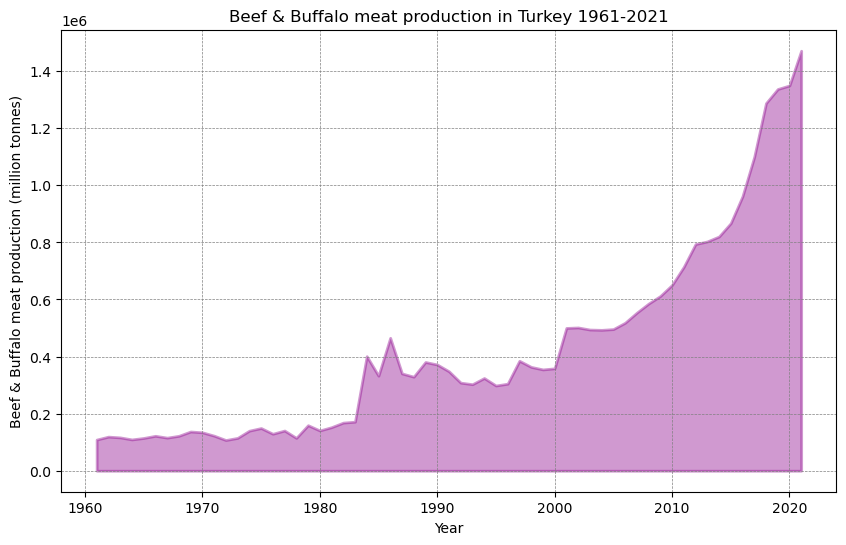

In [12]:
# Plotting as an area chart with edges marked
plt.figure(figsize=(10, 6))
plt.fill_between(Beef_and_Buffalo_meat_production_1961_2021_Turkey['Year'],
                 Beef_and_Buffalo_meat_production_1961_2021_Turkey['Meat, beef and buffalo'],
                 color='#8B008B', alpha=0.4, edgecolor='#8B008B', linewidth=2)  # Using a darker violet color code

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Beef & Buffalo meat production (million tonnes)')
plt.title('Beef & Buffalo meat production in Turkey 1961-2021')

# Display the plot with a black background and white grid lines
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')

# Set the figure background color to black
plt.gcf().set_facecolor('white')

plt.show()


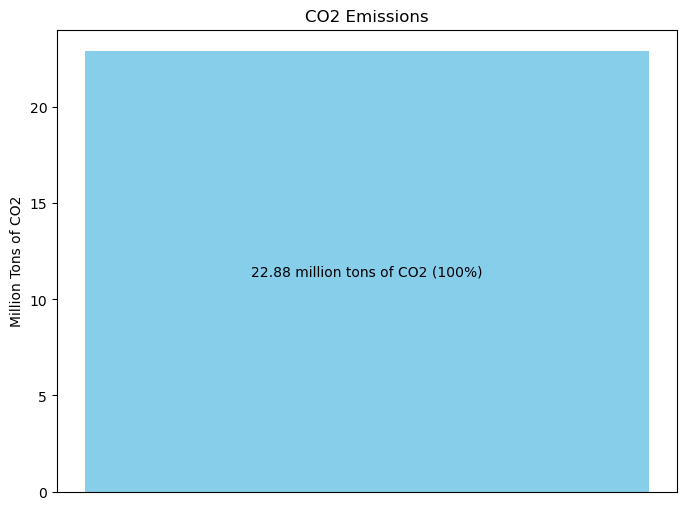

In [2]:
import matplotlib.pyplot as plt

# Data
co2_mln_tonnes = 22.88
percent = 100

# Create a figure and a single bar plot
plt.figure(figsize=(8, 6))
plt.bar(x='CO2', height=co2_mln_tonnes, color='skyblue')

# Add text annotation
plt.text(x='CO2', y=co2_mln_tonnes / 2, s=f'{co2_mln_tonnes} million tons of CO2 ({percent}%)', ha='center', va='center', color='black')

# Labeling
plt.ylabel('Million Tons of CO2')
plt.title('CO2 Emissions')

# Remove x-axis
plt.xticks([])

# Show plot
plt.show()


In [5]:
# Ankara 

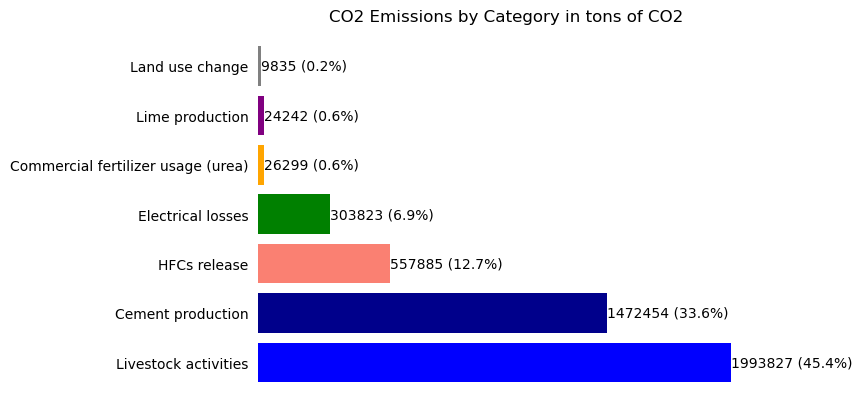

In [3]:
import matplotlib.pyplot as plt

# New Data
categories = ['Livestock activities', 'Cement production', 'HFCs release', 'Electrical losses', 'Commercial fertilizer usage (urea)', 'Lime production', 'Land use change']
CO2_values = [1993827, 1472454, 557885, 303823, 26299, 24242, 9835]
total_CO2 = sum(CO2_values)

# Sort the data by CO2 values in descending order
sorted_indices = sorted(range(len(CO2_values)), key=lambda k: CO2_values[k], reverse=True)
categories = [categories[i] for i in sorted_indices]
CO2_values = [CO2_values[i] for i in sorted_indices]

# Calculate percentages
percentages = [(value / total_CO2 * 100) for value in CO2_values]

# Define custom colors for each category
colors = ['blue', 'darkblue', 'salmon', 'green', 'orange', 'purple', 'gray']

# Create figure and axis
fig, ax = plt.subplots()

# Plot bars with custom colors
bars = ax.barh(categories, CO2_values, color=colors)

# Add CO2 values and percentages as text on the right side of bars
for bar, CO2_value, percentage in zip(bars, CO2_values, percentages):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{CO2_value} ({percentage:.1f}%)', va='center')

# Adding labels and title
ax.set_xlabel('Tons of CO2')
ax.set_title('CO2 Emissions by Category in tons of CO2')

# Remove the frame and axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False)  # Hide y-axis ticks

# Hide x-axis and its label
ax.axes.get_xaxis().set_visible(False)
ax.set_xlabel('')  # Remove x-axis label

# Show plot
plt.show()


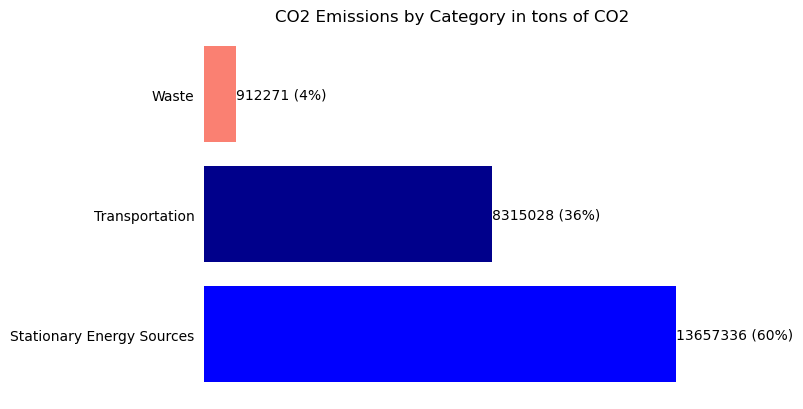

In [4]:
import matplotlib.pyplot as plt

# Data
categories = ['Stationary Energy Sources', 'Transportation', 'Waste']
CO2_values = [13657336, 8315028, 912271]
total_CO2 = sum(CO2_values)

# Sort the data by CO2 values in descending order
sorted_indices = sorted(range(len(CO2_values)), key=lambda k: CO2_values[k], reverse=True)
categories = [categories[i] for i in sorted_indices]
CO2_values = [CO2_values[i] for i in sorted_indices]

# Calculate percentages
percentages = [(value / total_CO2 * 100) for value in CO2_values]

# Define custom colors for each category
colors = ['blue', 'darkblue', 'salmon']

# Create figure and axis
fig, ax = plt.subplots()

# Plot bars with custom colors
bars = ax.barh(categories, CO2_values, color=colors)

# Add CO2 values and percentages as text on the right side of bars
for bar, CO2_value, percentage in zip(bars, CO2_values, percentages):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{CO2_value} ({percentage:.0f}%)', va='center')

# Adding labels and title
ax.set_xlabel('Tons of CO2')
ax.set_title('CO2 Emissions by Category in tons of CO2')

# Remove the frame and axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False)  # Hide y-axis ticks

# Hide x-axis and its label
ax.axes.get_xaxis().set_visible(False)
ax.set_xlabel('')  # Remove x-axis label

# Show plot
plt.show()
